In [57]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
data = pd.read_csv('netflix-shows/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [59]:
print("Columns  : " , data.shape[1])
print("\nFeatures : \n" , data.columns.tolist())
print("\nMissing values :  ", data.isnull().sum())
print("\nUnique values :  \n", data.nunique())
print("\nInfo : \n") 
print(data.info())

Columns  :  12

Features : 
 ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Missing values :   show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Unique values :  
 show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

Info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null obje

In [60]:
data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


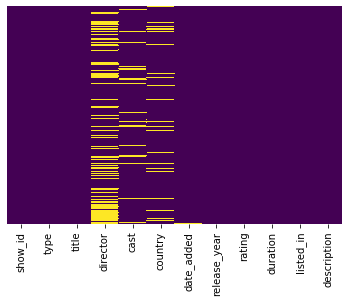

In [63]:
sns.heatmap(data.isnull(), yticklabels=False, cmap = 'viridis', cbar = False)

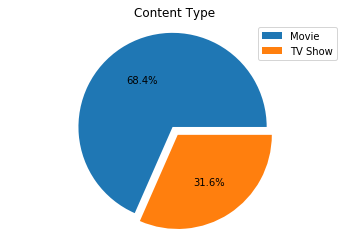

In [61]:
group_type = data['type'].value_counts()
plt.pie(group_type, explode = [0.1, 0], autopct='%1.1f%%')
plt.axis('equal')
plt.title("Content Type")
plt.legend(group_type.index)
plt.show()

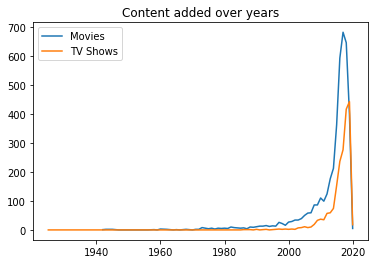

In [62]:
Movies = data[data['type'] == 'Movie']
TvShows = data[data['type'] == 'TV Show']

movie_counts = Movies['release_year'].value_counts().reset_index()
movie_counts = movie_counts.rename(columns = {'index':'release_year', 'release_year':'count'})
movie_counts = movie_counts.sort_values('release_year')
plt.plot(movie_counts['release_year'], movie_counts['count'])

tvshows_counts = TvShows['release_year'].value_counts().reset_index()
tvshows_counts = tvshows_counts.rename(columns = {'index':'release_year', 'release_year':'count'})
tvshows_counts = tvshows_counts.sort_values('release_year')
plt.plot(tvshows_counts['release_year'], tvshows_counts['count'])

plt.title('Content added over years')
plt.legend(['Movies', 'TV Shows'])

plt.show()